In [1]:
import pandas as pd 

tips = pd.read_csv('C:/Users/Justin/Downloads/pydata-book-2nd-edition/examples/tips.csv')


In [2]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

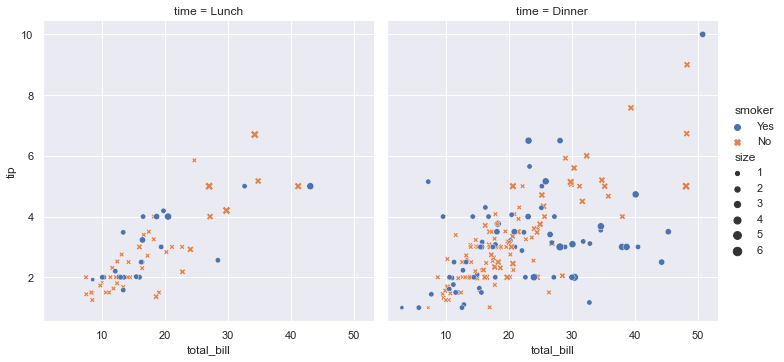

In [5]:
# Import seaborn 
import seaborn as sns 

# Apply the default theme 
sns.set_theme()


# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(data=tips, x='total_bill', y='tip', col='time',
            hue='smoker', style='smoker', size='size')

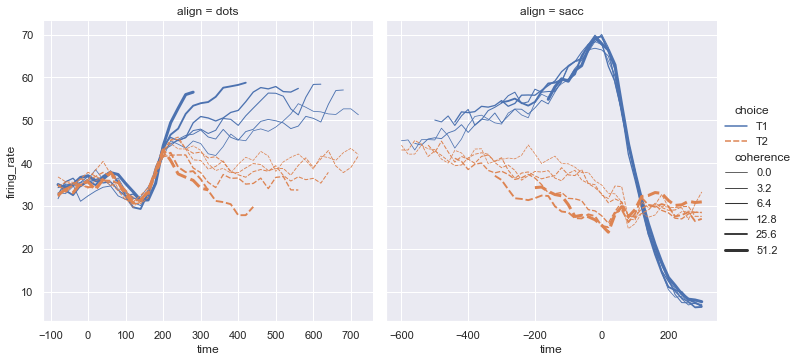

In [6]:
dots = sns.load_dataset("dots")

sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

#### Statistical estimation and error bars

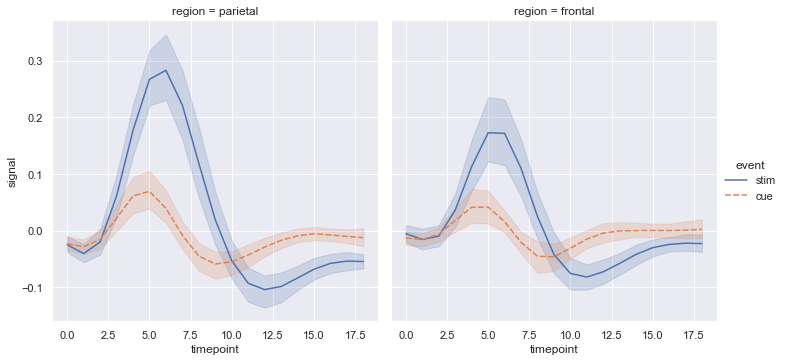

In [10]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

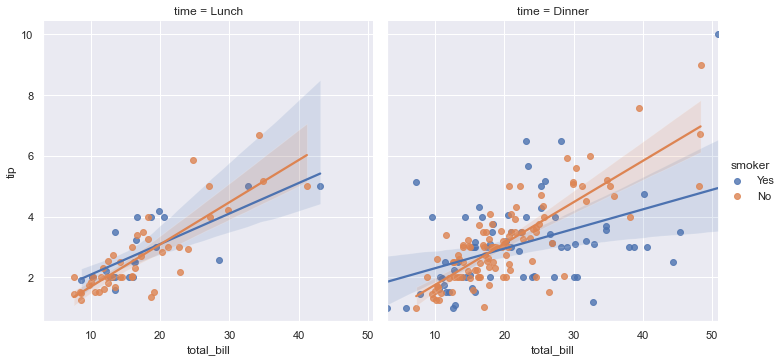

In [14]:
sns.lmplot(data=tips, x="total_bill", y="tip",
           col="time", hue="smoker")

### Informative distributional summaries

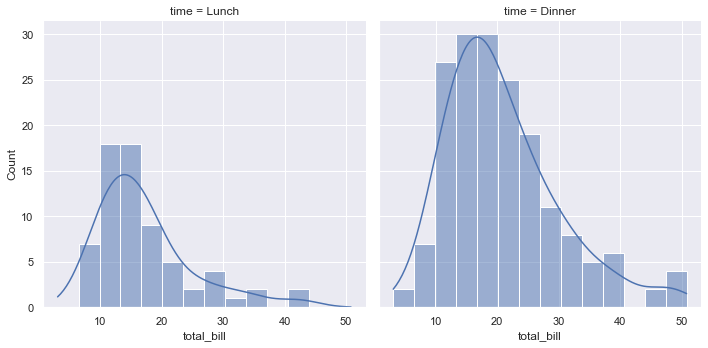

In [15]:
# Kde = kernel density estimation:

sns.displot(data=tips, x='total_bill', col="time", kde=True)

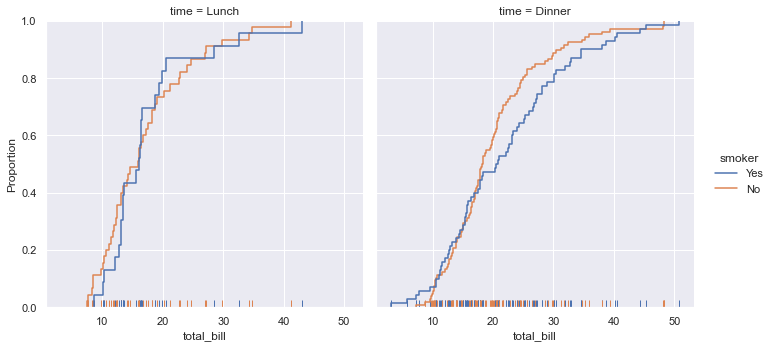

In [16]:
sns.displot(data=tips, kind='ecdf', x='total_bill', col='time', hue='smoker', rug=True)

### Specialized plots for categorical data

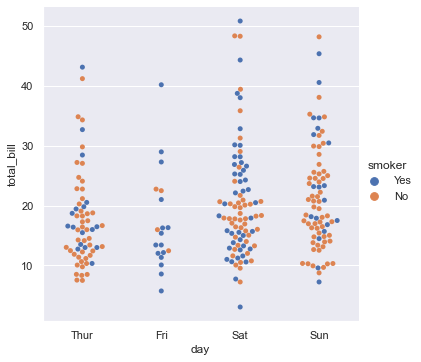

In [17]:
sns.catplot(data=tips, kind='swarm', x='day', y='total_bill', hue='smoker')

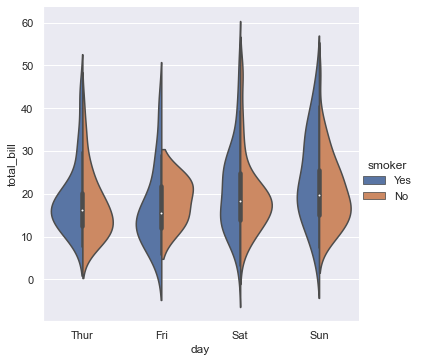

In [19]:
sns.catplot(data=tips, kind='violin', x='day', y='total_bill', hue='smoker', split=True)

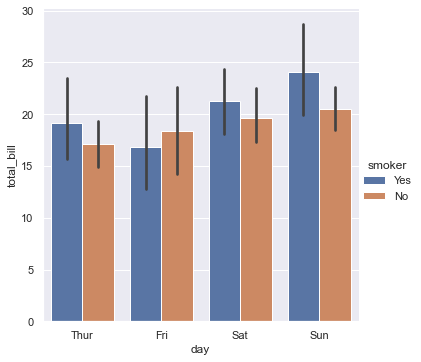

In [20]:
# Or you could show only the mean value and its confidence interval within each nested category:

sns.catplot(data=tips, kind='bar', x='day', y='total_bill', hue='smoker')

### Composite views onto multivariate datasets

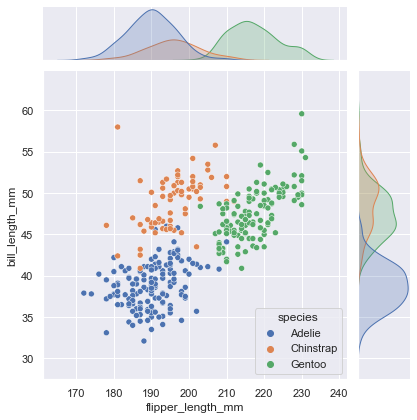

In [22]:
penguins = sns.load_dataset('penguins')
sns.jointplot(data=penguins, x='flipper_length_mm', y='bill_length_mm', hue='species')

The other, pairplot(), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively:

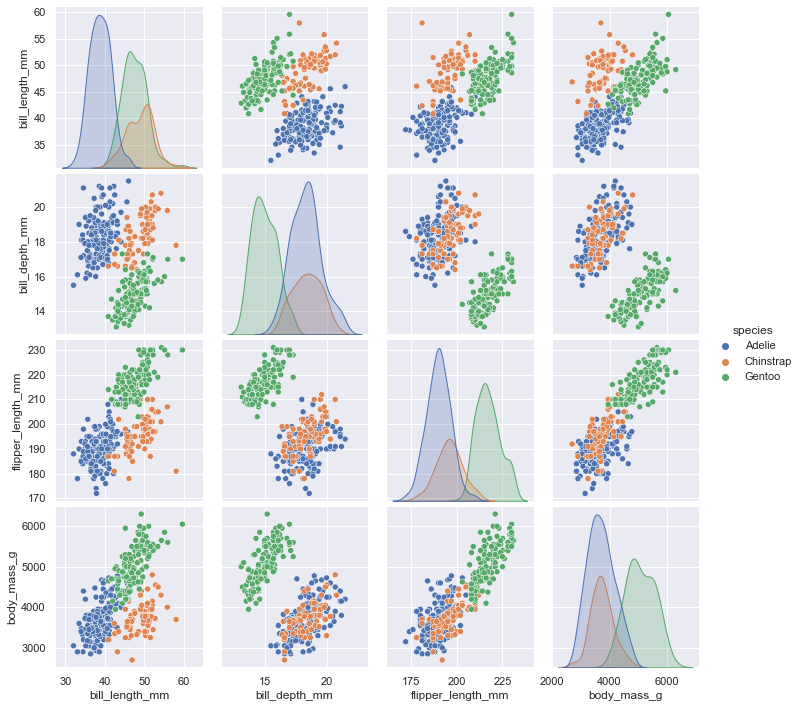

In [23]:
sns.pairplot(data=penguins, hue='species')

### Classes and functions for making complex graphics

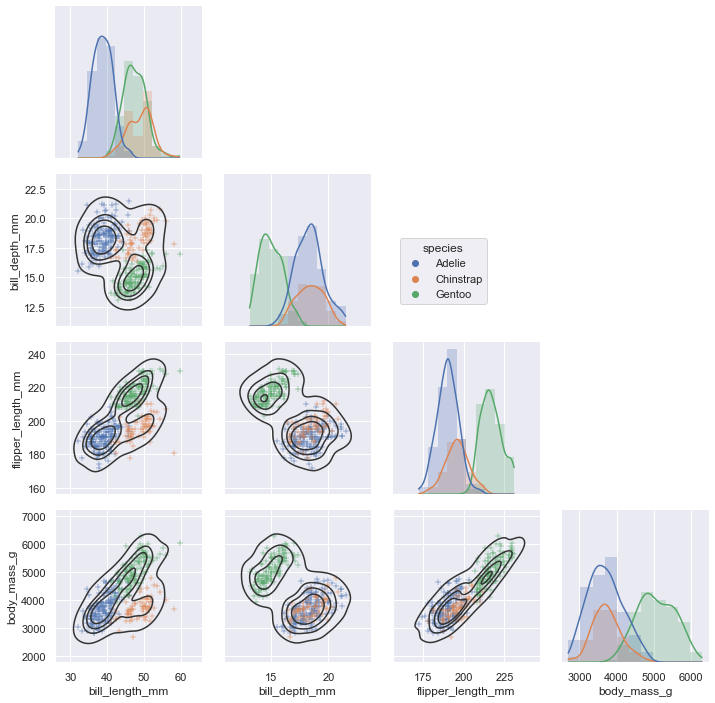

In [25]:
g = sns.PairGrid(penguins, hue='species', corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color='.2')
g.map_lower(sns.scatterplot, marker='+')
g.map_diag(sns.histplot, element='step', linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

#### Opinionated defaults and flexible customization

In many cases, seaborn will also choose default values for its parameters based on characteristics of the data. For example, the color mappings that we have seen so far used distinct hues (blue, orange, and sometimes green) to represent different levels of the categorical variables assigned to hue. When mapping a numeric variable, some functions will switch to a continuous gradient:

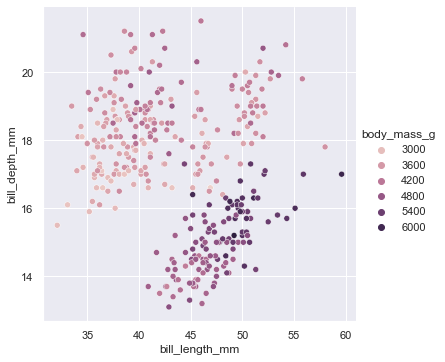

In [26]:
sns.relplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='body_mass_g')

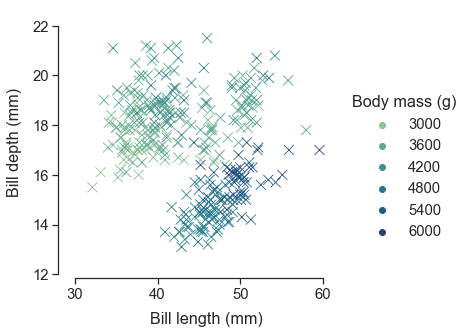

In [32]:
sns.set_theme(style='ticks', font_scale=1.35)

g = sns.relplot(
    data=penguins, x='bill_length_mm', y='bill_depth_mm', 
    hue='body_mass_g',palette='crest', marker='x', s=100,
)
g.set_axis_labels('Bill length (mm)', 'Bill depth (mm)', labelpad=10)
g.legend.set_title('Body mass (g)')
g.fig.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)